# Chem 30324, Spring 2020, Homework 9


# Due April 10, 2020


## The two-state system.
### Consider a closed system containing $N$ objects, each of which can be in one of two energy states, of energy either 0 or $\varepsilon$. The total internal energy $U$ of the box is the sum of the energies of the individual objects.

![Boltzmann](https://github.com/wmfschneider/CHE30324/blob/master/Homework/imgs/Boltzmann.png?raw=1)

### 1. Write down all the possible microstates for a box in which $N = 4$ and the internal energy $U = 2\varepsilon$.

$$N = 4$$
$$q = 2$$
To find the number of microstates, 
$$\Omega = \frac{N!}{(q!)(N-q)!} = 6$$

Possible Microstates:
$$(00\varepsilon\varepsilon)\qquad(0\varepsilon 0\varepsilon)\qquad(0\varepsilon \varepsilon 0)\qquad(\varepsilon 00\varepsilon)\qquad(\varepsilon 0\varepsilon 0)\qquad(\varepsilon \varepsilon 00)$$

### 2. What does the postulate of *equal a priori probabilities* say about the relative likelihood of occurance of any one of these microstates?

The postulate of equal a priori probabilities states that each microstate has the same probability of occuring.

### 3. What is the entropy of the box? (Thank you, Ludwig Boltzmann.)

In [5]:
import numpy as np
k = 1.380649e-23 #J/K
omega = 6 #number of possible microstates
S = k*np.log(omega)
print("The entropy of the box is kln6 = {0:8.3e} J/K.".format(S))

The entropy of the box is kln6 = 2.474e-23 J/K.


### 4. Suppose two identical such boxes are brought into thermal contact and allowed to come to equilibrium. Calculate the change in internal energy $\Delta U$ and in entropy $\Delta S$ associated with this process.

In [11]:
from math import factorial
import numpy as np

k = 1.380649e-23 #J/K
epsilon = 1. # some amount of energy

def Omega(N,q):
    return factorial(N)/(factorial(q)*factorial(N-q))

def S(N,q):
    return k*np.log(Omega(N,q))

def U(N,q):
    return q*epsilon

#2 identical Boxes, separated
N = 4; q = 2

Sseparated = S(N,q)
Useparated = U(N,q)

#2 Boxes, Combined
N2 = N*2
q2 = q*2

Scombined = S(N2,q2)
Ucombined = U(N2,q2)

deltaS = Scombined - 2*Sseparated
deltaU = Ucombined - 2*Useparated
print('The change in entropy is',deltaS,"J/K")
print('The change in energy is',deltaU,"epsilon")
print('The energy of a closed system is constant (first law)')
print('The entropy change in any spontaneous process in a closed system is > 0')



The change in entropy is 9.180988685797155e-24 J/K
The change in energy is 0.0 epsilon
The energy of a closed system is constant (first law)
The entropy change in any spontaneous process in a closed system is > 0


## The canonical ensemble.
### The energy spectrum of some molecule is described by the diagram below.  A large number $N$ of these distinguishable molecules is in thermal equilibrium with a much larger reservoir of temperature $T$.

![Energy States](https://github.com/wmfschneider/CHE30324/blob/master/Homework/imgs/EnergyStates.png?raw=1)

### 5. Write the partition function $q$ for one of the molecules in the system (a) in terms of $T$ and $\varepsilon$, (b) in terms of $\beta = 1/k_B T$ and $\varepsilon$, and (c) in terms of a characteristic temperature $\theta = \varepsilon/k_B$.

$a) q = e^{\frac{0}{k_bT}}+2e^{\frac{-\epsilon}{k_bT}}+3e^{\frac{-2\epsilon}{k_bT}} = 1+2e^{\frac{-\epsilon}{k_bT}}+3e^{\frac{-2\epsilon}{k_bT}}$

$b) q = e^{0\beta}+2e^{-\epsilon\beta}+3e^{-2\epsilon\beta} = 1 +2e^{-\epsilon\beta}+3e^{-2\epsilon\beta}$

$c) q = e^{\frac{0\theta}{T}}+2e^{\frac{-\theta}{T}}+3e^{\frac{-2\theta}{T}} = 1+2e^{\frac{-\theta}{T}}+3e^{\frac{-2\theta}{T}}$

### 6. Plot the relative fractions of molecules of energy 0, $\varepsilon$, and $2\varepsilon$  vs. temperature.  Assume $\theta = 300$ K. Be sure to indicate the probabilities in the limits of $T\rightarrow 0$ and $T \rightarrow \infty$.

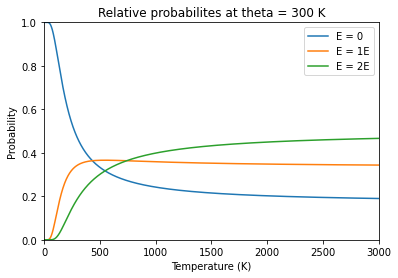

When T --> 0, there is a 100% probability of E = 0. As T --> oo, E = 0 has a 1/6 probability
E = 1E has a 1/3 probability and E = 2E has a 1/2 probability.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta = 300 #K
T = np.linspace (1,3000,1000)
Ptot = 1 + 2*np.exp(-theta/T) + 3*np.exp(-2*theta/T)
P0 = 1*np.exp(-0*theta/T)/ Ptot
P1 = 2*np.exp(-theta/T) / Ptot
P2 = 3*np.exp(-2*theta/T) / Ptot

plt.plot(T,P0, label = 'E = 0')
plt.plot(T,P1, label = 'E = 1E')
plt.plot(T,P2, label = 'E = 2E')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Probability')
plt.title('Relative probabilites at theta = 300 K')
plt.ylim(0,1)
plt.xlim(0,3000)

plt.show()
print('When T --> 0, there is a 100% probability of E = 0. As T --> oo, E = 0 has a 1/6 probability')
print('E = 1E has a 1/3 probability and E = 2E has a 1/2 probability.')


### 7. Derive an expression for the internal energy $U$ per molecule by summing over the possible microstates weighted by their probabilities. Plot the average energy vs. temperature, assuming  $\theta =300$ K.

$U = 0P(0) + \varepsilon P(\varepsilon) + 2\varepsilon P(2\varepsilon) = \varepsilon\frac{2e^{-\beta\varepsilon}}{q} + 2\varepsilon\frac{3e^{-2\beta\varepsilon}}{q} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

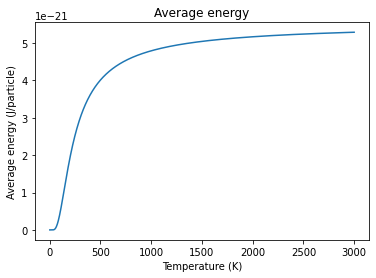

In [0]:
epsilon = theta*k # as we needed epsilon in expression
U = (2.*epsilon * np.exp(-theta/T) + 6.*epsilon * np.exp(-2.*theta/T))/ Ptot # average energy J per particle
plt.plot(T,U)
plt.xlabel('Temperature (K)')
plt.ylabel('Average energy (J/particle)')
plt.title('Average energy')
plt.show()


### 8. Derive an expression for the internal energy $U$ per molecule by taking the appropriate derivative of the partition function from problem 5 (*Hint:* it is easier to work with the expressions in term of $\beta$ than in $T$.) Does your result agree with that from Question 7?

$\left<U\right> = -\left(\frac{dlnq}{d\beta}\right) = -\frac{1}{q}\left(\frac{dq}{d\beta}\right) = -\frac{1}{q}\frac{d(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})}{d\beta} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$ 

Same expression as problem 7.

### 9. Derive an expression for the Helmholtz energy $A$ per molecule from the partition function. Plot $A$ vs. temperature, assuming $\theta
= 300$ K.

$A = U - TS = U - T(\frac{U}{T}+k_B\ln q) = -k_BTlnq = -k_BT\ln(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon}) = -k_BT\ln(1 + 2e^{-300/T} + 3e^{-600/T})$

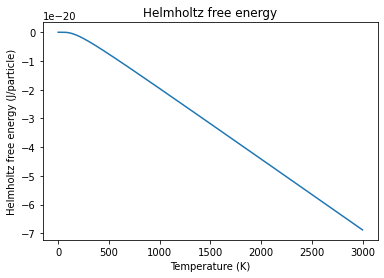

In [0]:
Ptot = 1. + 2.*np.exp(-theta/T) + 3.*np.exp(-2.*theta/T) # partition function
A = -k*T*np.log(Ptot) # J/particle
plt.plot(T,A)
plt.xlabel('Temperature (K)')
plt.ylabel('Helmholtz free energy (J/particle)')
plt.title('Helmholtz free energy')
plt.show()

### 10. Derive an expression for the entropy $S$ per molecules and plot vs. temperature, again assuming $\theta = 300$ K.

$S = \frac{U-A}{T}= \frac{U}{T} + k_B\ln q = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})T} + k_B\ln(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})$

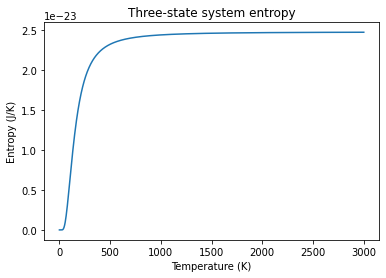

In [0]:
S = (U-A)/T

plt.plot(T,S)
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (J/K)')
plt.title('Three-state system entropy')
plt.show()

### 11. In class we took the First Law as a postulate and demonstrated the Second Law. Look at your results for Problems 6 and 10. Can you use them to rationalize the Third Law? Explain your answer.

Yes. The entropy at absolute zero is equal to zero. From problem 6, we can get when T = 0 K, the molecule has the probability of 1 to be in the 0 energy state. $S(T = 0 K) = k_Bln(1) = 0$. From number 10, we can also get $S \rightarrow 0$ when $T\rightarrow 0$.